In [846]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime 

import warnings
warnings.filterwarnings('ignore')

## 1. Tiền xử lý dữ liệu

In [847]:
train_df = pd.read_csv('clean_data.csv')
train_df_temp = train_df.copy()
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,17/10/2018
2,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,05/10/2018
3,781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,06/10/2018
4,789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,09/10/2018


### Bỏ đi những cột không cần thiết

In [848]:
train_df_temp.drop('City', axis= 1, inplace = True)
train_df_temp.drop('Date', axis= 1, inplace = True)

### Tạo thêm đặc trưng cho bảng dữ liệu 
> Dựa vào đặc trưng: 'Title' để tạo thêm 6 đặc trưng: isNew(phòng mới hay cũ) , hasFurniture (có nội thất không), liveTogether(ở ghép/ktx), isWholeHouse (có phải nhà nguyên căn không), isApartment (có phải căn hộ không), isNearCenter (có gần trung tâm không)

In [849]:
def isWholeHouse(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nguyên']
    df['isWholeHouse'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [850]:
def isLiveTogether(df):
    df["Title"] = df["Title"].str.lower()
    e = ['ghép','share',"ktx",'túc']
    df['isLiveTogether'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [851]:
def isApartment(df):
    df["Title"] = df["Title"].str.lower()
    e = ['hộ','cư', 'chdv']
    df['isApartment'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [852]:
def isNew(df):
    df["Title"] = df["Title"].str.lower()
    e = ['mới', 'vừa', 'xây']
    df['isNew'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [853]:
def isNearCenter(df):
    df["Title"] = df["Title"].str.lower()
    e = ['tâm', 'tam']
    df['isNearCenter'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [854]:
def hasFurniture(df):
    df["Title"] = df["Title"].str.lower()
    e = ['nội thất', 'noi that', 'tiện nghi','tiện ích','cao cấp','cao cap','hiện đại','hien dai']
    df['hasFurniture'] = df["Title"].apply(lambda x: 'yes' if any(i in x for i in e) else 'no')
    return df

In [855]:
train_df_temp = isNew(train_df_temp)
train_df_temp = isNearCenter(train_df_temp)
train_df_temp = hasFurniture(train_df_temp)
train_df_temp = isWholeHouse(train_df_temp)
train_df_temp = isLiveTogether(train_df_temp)
train_df_temp = isApartment(train_df_temp)

In [856]:
train_df_temp.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,isNew,isNearCenter,hasFurniture,isWholeHouse,isLiveTogether,isApartment
0,478324,cho thuê phòng để ở tại 108/64a1 trần quang di...,3.5,18.0,Quận 3,no,no,no,no,no,no
1,728993,phòng vừa xây xong thoáng mát gần các trường đ...,3.3,25.0,Quận 7,yes,no,no,no,no,no
2,781296,cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,yes,no,no,no,yes,no
3,781448,chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,no,no,no,no,no,yes
4,789361,"phòng cho thuê giá rẻ, quận gò vấp gần chung c...",1.7,12.0,Gò Vấp,no,no,no,no,no,yes


In [857]:
train_df_temp.shape

(1142, 11)

### Xác định biến Categorical/Numeric

In [858]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1142 non-null   int64  
 1   Title               1142 non-null   object 
 2   Price(Triệu/tháng)  1142 non-null   float64
 3   Square(m²)          1142 non-null   float64
 4   District            1142 non-null   object 
 5   isNew               1142 non-null   object 
 6   isNearCenter        1142 non-null   object 
 7   hasFurniture        1142 non-null   object 
 8   isWholeHouse        1142 non-null   object 
 9   isLiveTogether      1142 non-null   object 
 10  isApartment         1142 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 98.3+ KB


In [859]:
# Biến Categorical
cat_vars = ['District', 'isNew', 'hasFurniture', 'isLiveTogether','isNearCenter','isWholeHouse','isApartment']
# Biến numerical
num_vars = ['Price(Triệu/tháng)', 'Square(m²)']

Với biến numerical, nhóm dùng distplot để vẽ biểu đồ phân bố của 2 đặc trưng: Price và Square để quan sát

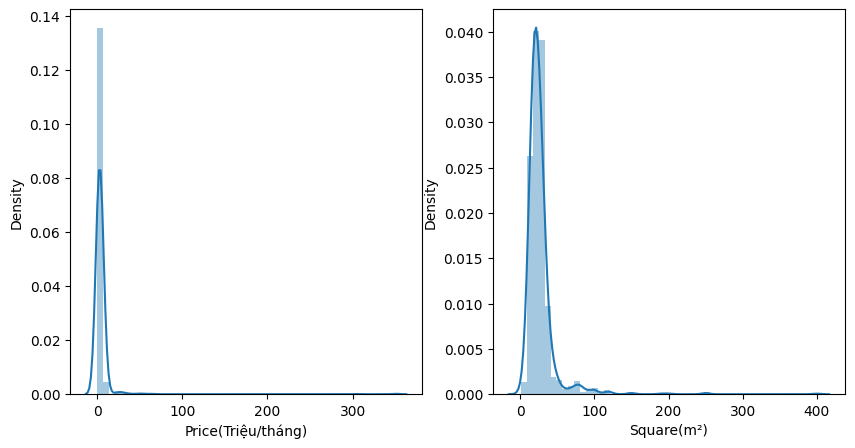

In [860]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.distplot(train_df_temp[num_vars[0]])
plt.subplot(122)
sns.distplot(train_df_temp[num_vars[1]])
plt.show()

Ta thấy ở thuộc tính giá dữ liệu tập trung dưới 10 triệu và ở diện tích dữ liệu tập trung dưới 100 triệu nên ta sẽ loại những dòng trên 10 triệu (giá) và 100 m^2 (Diện tích)

In [861]:
train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 10].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 100].index, inplace = True)


In [862]:
train_df_temp.describe()

,Id,Price(Triệu/tháng),Square(m²)
count,1.109000e+03,1109.000000,1109.000000
mean,1.509160e+06,3.220790,24.238548
std,3.378553e+05,1.673252,11.340440
min,4.783240e+05,0.002000,1.000000
25%,1.443570e+06,2.000000,18.000000
50%,1.561906e+06,3.000000,22.000000
75%,1.740950e+06,4.000000,30.000000
max,2.130491e+06,10.000000,100.000000


### Loại bỏ outliers

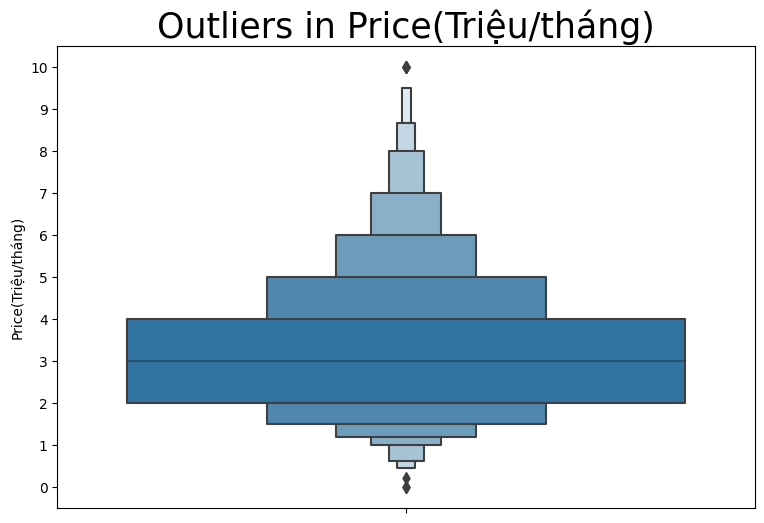

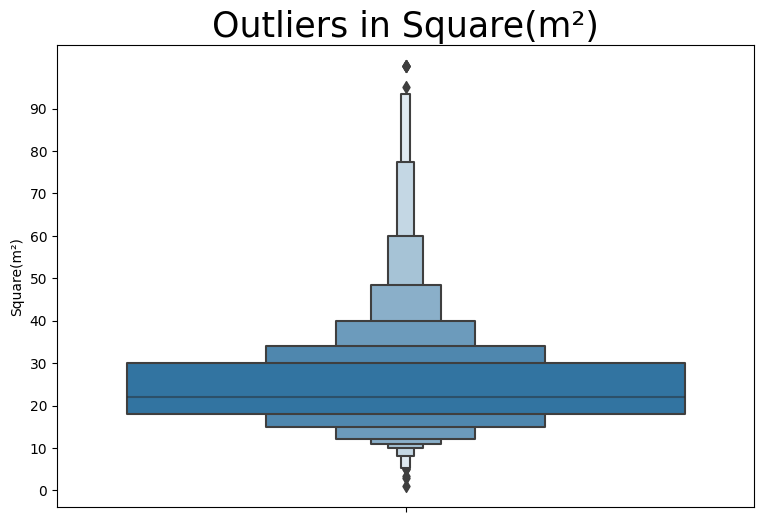

In [863]:
for col in num_vars:
    plt.figure(figsize=(9,6))
    sns.boxenplot(y=col,data=train_df_temp)
    plt.title('Outliers in {}'.format(col),fontsize=25,fontweight=5)
    if col == 'Price(Triệu/tháng)':
        plt.yticks(range(0,11,1))
    if col == 'Square(m²)':
        plt.yticks(range(0,100,10))
    plt.show()

Outliers ở giá nằm ở mức gần 10 triệu, ở diện tích nằm ở mức gần 100 và nằm dưới 5, ta sẽ loại những giá trị này để tránh ảnh hưởng

In [864]:

train_df_temp.drop(train_df_temp[train_df_temp['Price(Triệu/tháng)'] > 9.7].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] > 95].index, inplace = True)
train_df_temp.drop(train_df_temp[train_df_temp['Square(m²)'] < 5].index, inplace = True)


## 2. Chọn các feature để build model

### Ta sẽ chuyển các cột dạng Categorical sang Numerical

Ta sẽ dùng hàm get_dummies để chuyển cột dạng Categorical sang Numerical theo phương pháp one hot encoding

Lý do dùng: Vì các cột dạng categorical không có dạng order (có thứ tự) nên dùng one hot encoding sẽ đem lại hiệu quả cao hơn so với phương pháp encoding khác

In [865]:

df_new = train_df_temp.drop(columns=['Id', 'Title', 'Price(Triệu/tháng)', 'Square(m²)'])

df_new = pd.get_dummies(df_new)
df_new['Price'] = train_df_temp['Price(Triệu/tháng)']
df_new['Square'] = train_df_temp['Square(m²)']
df_new

,District_Bình Chánh,District_Bình Thạnh,District_Bình Tân,District_Gò Vấp,District_Hóc Môn,District_Nhà Bè,District_Phú Nhuận,District_Quận 1,District_Quận 10,District_Quận 11,...,hasFurniture_no,hasFurniture_yes,isWholeHouse_no,isWholeHouse_yes,isLiveTogether_no,isLiveTogether_yes,isApartment_no,isApartment_yes,Price,Square
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,3.5,18.0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,3.3,25.0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,3.0,15.0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,7.0,27.0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1.7,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,2.5,20.0
1138,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,2.0,6.0
1139,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,2.9,22.0
1140,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,3.5,52.5


Đối với những cột có độ tương quan với giá thấp hơn 0.01 (không ảnh hưởng nhiều), ta sẽ bỏ đi.

In [866]:
'''
fig= plt.subplots(figsize = (10,10))
sns.heatmap(df_new.corr(),annot=True)
plt.show()
'''

corr_price = df_new.corr()['Price']
drop_columns = corr_price[abs(corr_price)<0.01].index
df_new.drop(columns = drop_columns,inplace = True)


Ta thấy những cột ít có sự ảnh hưởng đến giá nhất là isWholeHouse, isNew, isNearCenter, District, ta sẽ bỏ những thuộc tính này đi

## 3 Xây dựng model

In [867]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import time

Ta sẽ chọn các thuật toán là LinearRegression, Ridge, Lasso, KNeighborsRegressor, RandomForestRegressor

### Chia các tập train, test

In [868]:
X = df_new.drop(columns=['Price'])
y = df_new['Price']

Scale dữ liệu: Ta dùng phương pháp MinMaxScaler vì chúng ta đã loại đi các outliers và dữ liệu của ta không âm

In [869]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.14444444],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.22222222],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.11111111],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.18888889],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.52777778],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.14444444]])

Ta sẽ dùng phương pháp K Fold Cross Validation để chọn mô hình tốt nhất

In [870]:
from sklearn.model_selection import cross_val_score

In [871]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)


In [872]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.47216

In [873]:
model = Ridge()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.48005

In [874]:
model = Lasso()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

-0.02095

In [875]:
model = KNeighborsRegressor()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.37243

In [876]:
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.45387

Ta sẽ chọn ra 3 mô hình có điểm cao nhất là LinearRegression, Ridge, RandomForestRegressor

======TRAIN======
Train error (MAE): 0.81195
R2 score : 0.52587
======TEST======
Test error (MAE): 0.76943
R2 score : 0.59668


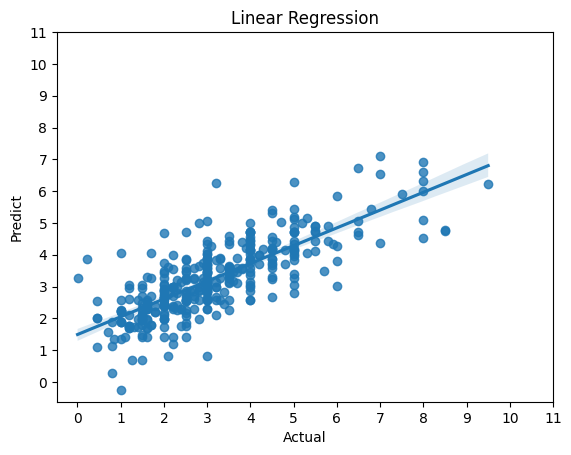

In [877]:
model = LinearRegression()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.80614
R2 score : 0.52911
======TEST======
Test error (MAE): 0.76959
R2 score : 0.5994


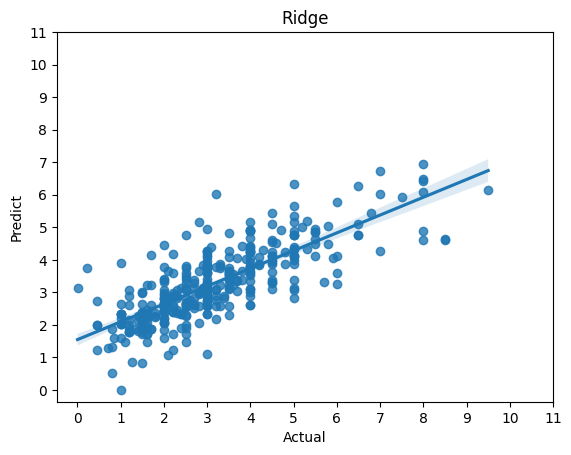

In [878]:
model = Ridge()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Ridge')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

======TRAIN======
Train error (MAE): 0.43237
R2 score : 0.85449
======TEST======
Test error (MAE): 0.72768
R2 score : 0.63084


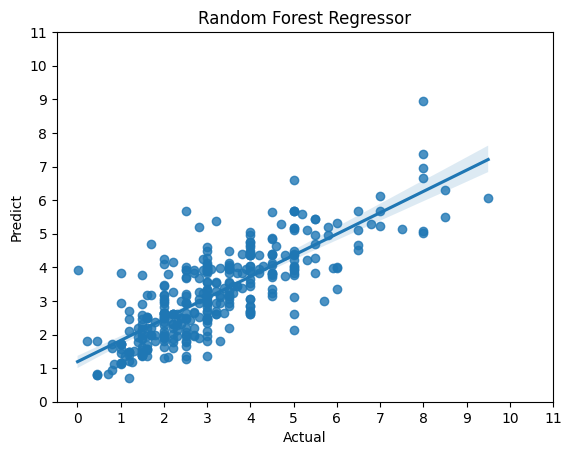

In [879]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Random Forest Regressor')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

Ta thấy tuy train Linear và Ridge có R2_score thấp cùng độ lỗi cao nhưng khi cho chạy tập test thì lại có kết quả tốt hơn cả train. RandomForestRegressor thì ngược lại, train đưa ra kết quả rất tốt nhưng thực tế lại đưa ra kết quả thấp hơn gần 20% so với lúc train. Tuy vẫn cao hơn 2 model kia nhưng có vẻ model này đã bị overfit

Ta thử dùng phương pháp Stacking để kết hợp 3 model này lại để xem kết quả có tổt hơn không.

In [880]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter('ignore')

In [881]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge()
rfr = RandomForestRegressor()
svr_rbf = SVR(kernel='rbf')

======TRAIN======
Train error (MAE): 0.40223
R2 score : 0.86168
======TEST======
Test error (MAE): 0.78385
R2 score : 0.58344


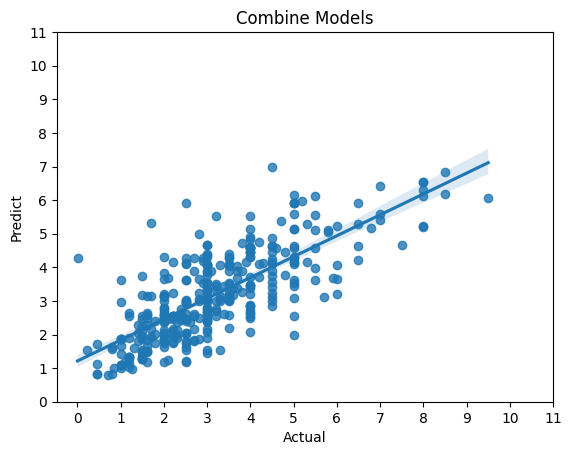

In [883]:
model = StackingRegressor(regressors=[svr_lin, lr, ridge,rfr], 
                           meta_regressor=svr_rbf)
model.fit(X_train,y_train)

print("======TRAIN======")
y_pre_train = model.predict(X_train)
score_train = mean_absolute_error(y_train,y_pre_train).round(5)
score_r2 = r2_score(y_train,y_pre_train).round(5)
print("Train error (MAE): {}".format(score_train))
print("R2 score : {}".format(score_r2))
print("======TEST======")
y_pre_test = model.predict(X_test)
score_test = mean_absolute_error(y_test,y_pre_test).round(5)
score_r2 = r2_score(y_test,y_pre_test).round(5)
print("Test error (MAE): {}".format(score_test))
print("R2 score : {}".format(score_r2))
sns.regplot(x = y_test, y = y_pre_test)
plt.title('Combine Models')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.xticks(range(0,12,1))
plt.yticks(range(0,12,1))
plt.show()

Ta thấy kết quả train thì tốt nhưng kết quả lúc chạy tập test thì khá tệ (như RandomForestRegressor ), chỉ cỡ 57%. Có vẻ cũng đã xuất hiện hiện tượng overfit